In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Edge Detection
One of the fundamental operations in image processing. It helps use reduce amount of data to process while maintaining the structural aspect of the image.
1. Sobel Edge Detection (First order detection)
2. Roberts Edge Detection (First order detection)
3. Prewitt Edge Detection (First order detection)
4. Kirsch Edge Detection (First order detection)
5. Nevatia/Babu Edge Detection (First order detection)
6. Laplacian Edge Detection (Second order detection)
7. Canny Edge Detection


- First Order Detection - Very sensitive to noise and produce thicker edges (Maximum Detection).
- Second Order Detection - Less sensitive to noise. (Zero-Crossing Detection)

$$x(t) \longleftrightarrow X(j\omega)$$
$$\frac{d[x(t)]}{dx} \longleftrightarrow j\omega X(j\omega)$$

As we can see, differentiation amplifies noise, smoothening is suggested prior to applying edge detection.

Choosing the optimal edge detection depends on the edge profile of the object to be detected.

## Sobel Edge Detection
A gradient based method, calculating first order derivatives of the image separately for the X and Y axes. It uses two 3x3 kernels which are convolved with the original image to calculate approximations of the derivatives. It is more sensitive to diagonal edges than to the horizontal and vertical edges.
$$\text{X kernel} = \begin{bmatrix}-1 & 0 & +1\\-2 & 0 & +2\\-1 & 0 & +1\end{bmatrix}$$

$$\text{Y kernel} = \begin{bmatrix}+1 & +2 & +1\\0 & 0 & 0\\-1 & -2 & -1\end{bmatrix}$$
Edge shown by jump in intensity (1-D image)<img src="../resources/sobel1.jpg">Edge more easy to observe after taking first derivative (maximum)<img src="../resources/sobel2.jpg">
Function: <b>cv2.Sobel(image, depth, dx, dy[, dst[, ksize...]])</b>

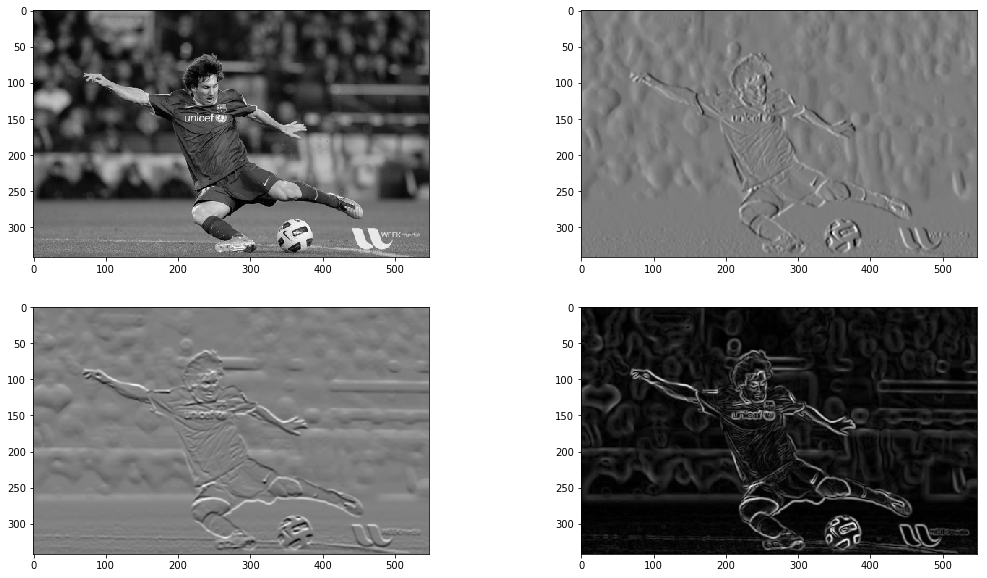

In [2]:
image = cv2.imread('../resources/messi.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (3, 3), 0)

sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)

# sobel = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')

fig.add_subplot(2, 2, 2)
plt.imshow(sobelx, cmap='gray')

fig.add_subplot(2, 2, 3)
plt.imshow(sobely, cmap='gray')

fig.add_subplot(2, 2, 4)
plt.imshow(sobel, cmap='gray')

plt.show()

## Roberts Edge Detection
It uses two 2x2 kernels. One kernel is simply the other rotated by 90 degrees.
$$\text{X kernel} = \begin{bmatrix}+1 & 0\\0 & -1\end{bmatrix}$$

$$\text{Y kernel} = \begin{bmatrix}0 & +1\\-1 & 0\end{bmatrix}$$

Responds maximally to edges running at 45° to the pixel grid. It is very quick to compute. Since it uses such a small kernel, it's highly sensitive to noise. It also produces weak responses to genuine edges.

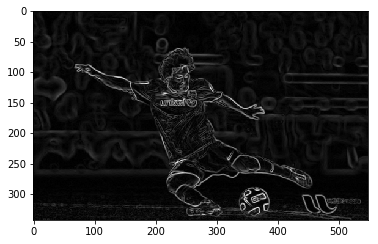

In [3]:
from scipy import ndimage

roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

img = np.asarray(blurred, dtype="int32")

vertical = ndimage.convolve(img, roberts_y)
horizontal = ndimage.convolve(img, roberts_x)

robert = np.sqrt(np.square(vertical) + np.square(horizontal))

plt.imshow(robert, cmap='gray')
plt.show()

## Prewitt Edge Detection
Uses two 3x3 kernels to calculate approximations of the derivatives.
$$\text{X kernel} = \begin{bmatrix}+1 & 0 & -1\\+1 & 0 & -1\\+1 & 0 & -1\end{bmatrix}$$

$$\text{Y kernel} = \begin{bmatrix}+1 & +1 & +1\\0 & 0 & 0\\-1 & -1 & -1\end{bmatrix}$$

As compared to Sobel, the Prewitt masks are simpler to implement but are very sensitive to noise. It is more sensitive to horizontal and vertical edges

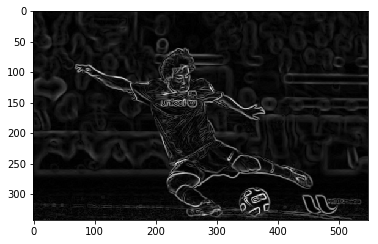

In [4]:
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

horizontal = ndimage.convolve(img, prewitt_x)
vertical = ndimage.convolve(img, prewitt_y)

prewitt = np.sqrt(np.square(horizontal) + np.square(vertical))

plt.imshow(prewitt, cmap='gray')
plt.show()

## Kirsch Edge Detection
Uses a single 3x3 kernel mast and rotates it in 45 degrees increments through all the 8 compass directions.
$$kernel = \begin{bmatrix}+5 & +5 & +5\\-3 & 0 & -3\\-3 & -3 & -3\end{bmatrix}$$
<img src="../resources/compass.jpg">
It's good detector but requires a lot of computations.

Nevatia/Babu Edge Detection is similar to Kirsch, the matirx rotates in 30 degree increments from 0->30->60->90->120->150.

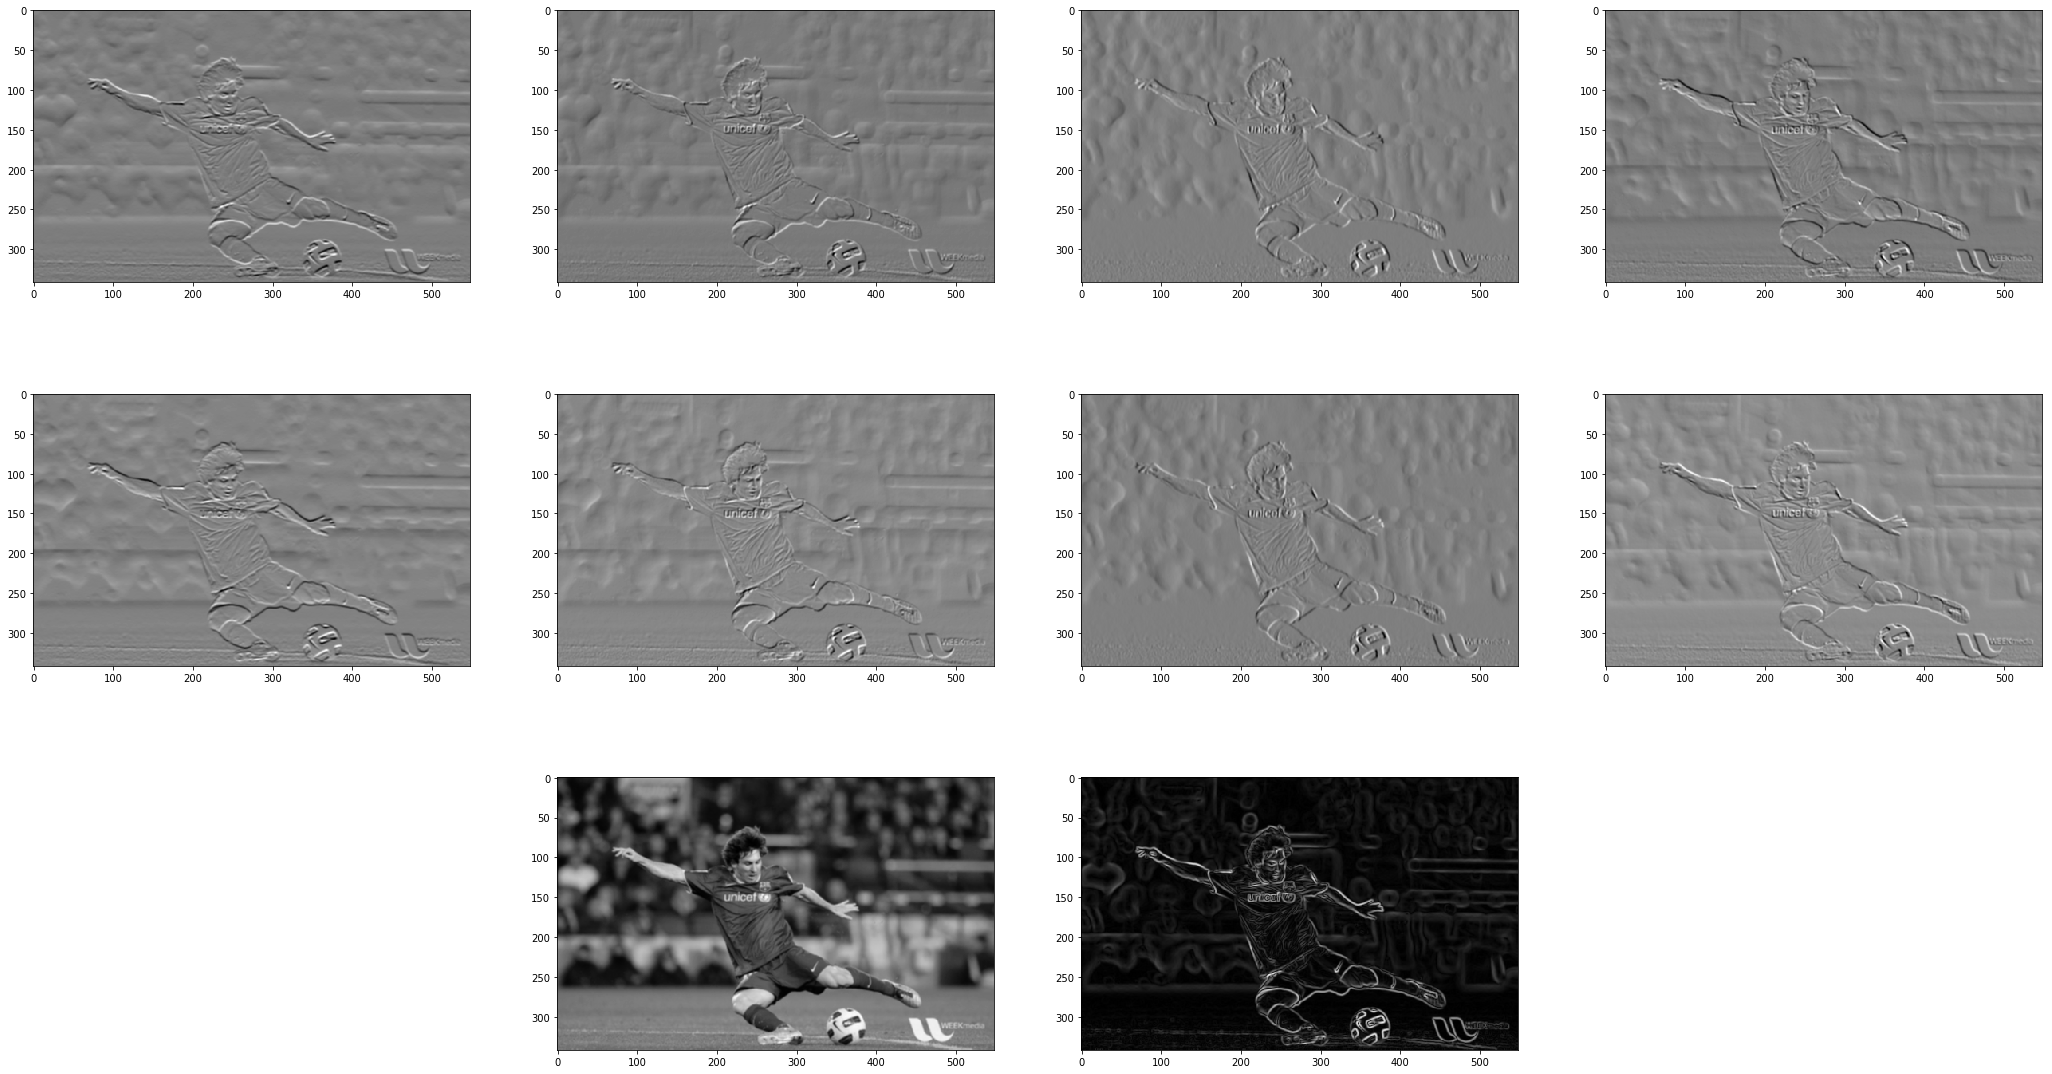

In [5]:
def rotate_45(array):
    result = np.zeros_like(array)
    for i in range(3):
        for j in range(3):
            if i == 0 and j == 0:   result[i+1][j] = array[i][j]
            elif i == 2 and j == 0: result[i][j+1] = array[i][j]
            elif i == 2 and j == 2: result[i-1][j] = array[i][j]
            elif i == 0 and j == 2: result[i][j-1] = array[i][j]
            elif i == 0:            result[i][j-1] = array[i][j]
            elif j == 0:            result[i+1][j] = array[i][j]
            elif i == 2:            result[i][j+1] = array[i][j]
            elif j == 2:            result[i-1][j] = array[i][j]
    return result

kernel_n = np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]])
kernel_nw = rotate_45(kernel_n)
kernel_w = rotate_45(kernel_nw)
kernel_sw = rotate_45(kernel_w)
kernel_s = rotate_45(kernel_sw)
kernel_se = rotate_45(kernel_s)
kernel_e = rotate_45(kernel_se)
kernel_ne = rotate_45(kernel_e)

d1 = ndimage.convolve(img, kernel_n)
d2 = ndimage.convolve(img, kernel_nw)
d3 = ndimage.convolve(img, kernel_w)
d4 = ndimage.convolve(img, kernel_sw)
d5 = ndimage.convolve(img, kernel_s)
d6 = ndimage.convolve(img, kernel_se)
d7 = ndimage.convolve(img, kernel_e)
d8 = ndimage.convolve(img, kernel_ne)

kirsch = np.sqrt(np.square(d1) + np.square(d2) + np.square(d3) + np.square(d4) +  
                 np.square(d5) + np.square(d6) + np.square(d7) + np.square(d8))

fig = plt.figure()
fig.set_size_inches(36, 20)

fig.add_subplot(3, 4, 1)
plt.imshow(d1, cmap='gray')

fig.add_subplot(3, 4, 2)
plt.imshow(d2, cmap='gray')

fig.add_subplot(3, 4, 3)
plt.imshow(d3, cmap='gray')

fig.add_subplot(3, 4, 4)
plt.imshow(d4, cmap='gray')

fig.add_subplot(3, 4, 5)
plt.imshow(d5, cmap='gray')

fig.add_subplot(3, 4, 6)
plt.imshow(d6, cmap='gray')

fig.add_subplot(3, 4, 7)
plt.imshow(d7, cmap='gray')

fig.add_subplot(3, 4, 8)
plt.imshow(d8, cmap='gray')

fig.add_subplot(3, 4, 10)
plt.imshow(img, cmap='gray')

fig.add_subplot(3, 4, 11)
plt.imshow(kirsch, cmap='gray')

plt.show()

## Laplacian Edge Detection
Uses one 3x3 kernel and calculates second order derivatives in a single pass.
$$kernel = \begin{bmatrix}0 & +1 & 0\\+1 & -4 & +1\\0 & +1 & 0\end{bmatrix}$$

For taking diagonals into consideration,
$$kernel = \begin{bmatrix}+1 & +1 & +1\\+1 & -8 & +1\\+1 & +1 & +1\end{bmatrix}$$
<img src="../resources/laplacian.jpg">
Function: <b>cv2.Laplacian(image, depth[, dst[, ksize...]])</b>

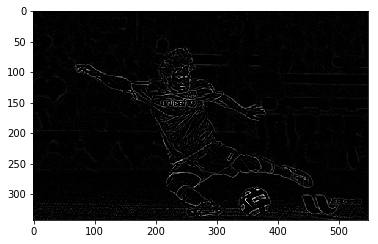

In [6]:
laplacian = cv2.Laplacian(blurred, cv2.CV_16U)

plt.imshow(laplacian, cmap='gray')
plt.show()

## Canny Edge Detection
Apart from first order derivatives, this also utilizes non-maxima supression and hysteresis thresholding in order to detect weak and strong edges. It uses a multi-stage algorithm to detect a wide range of edges in images.

<b>Process</b>:
1. <u>Noise Supression</u> - To smooth the image and reduce noise, a Gaussian filter is applied to convolve with the image. The larger the size of kernel, the lower the detector’s sensitivity to noise. A 5×5 is a good size for most cases.

2. <u>Finding Intensity Gradient of Image</u> - Uses four filters to detect horizontal, vertical and diagonal edges in the blurred image(Sobel kernel is preferred). These return first order derivatives in horizontal direction (G<sub>x</sub>) and vertical direction (G<sub>y</sub>)
$$G = \sqrt{G_{x}^2 + G_{y}^2}$$
$$\theta = \tan^{-1}\frac{G_{y}}{G_{x}}$$

3. <u>Non Maxima Supression</u> - It's an edge thinning technique. At every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Thus, all the gradient values are supressed to 0 except the local maximal, which indicates location with the sharpest change of intensity value.
    - Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions.
    - If the edge strength of the current pixel is the largest compared to the other pixels in the mask with the same direction, the value will be preserved. Otherwise, the value will be suppressed.
4. <u>Double Thresholding</u> - Some edge pixels due to noise and color variation are still left. Two threshold values are selected => maxThresh and minThresh. Pixels with value above maxThresh are labelled strong edges, those below minThresh are supressed and those lying between minThresh and maxThresh are labelled weak edges.
<img src="../resources/canny.jpg">
5. <u>Hysteresis Edge Tracking</u> - Connected component analysis is done on all the weak edges now. Lets say our hysteresis threshold is 3. So, if a weak edge pixel has 3 or more than 3 strong edge pixels amongst its 8 neighboring pixels, it will be marked as an edge, otherwise will be supressed.

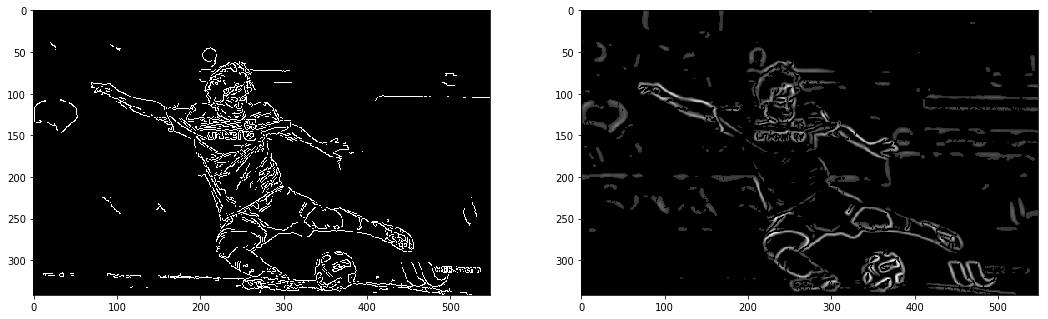

In [48]:
canny_inbuilt = cv2.Canny(gray, 100, 200)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(canny_inbuilt, cmap='gray')

def canny_experimental(image):
    # Noise Supression
    sigma = 1.4  # experimental
    blurred = cv2.GaussianBlur(image, (5, 5), sigma)
    blurred = np.asarray(blurred, dtype="int32")
    
    # Intensity Gradient
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobelx = ndimage.convolve(blurred, kernel_x)
    sobely = ndimage.convolve(blurred, kernel_y)
    sobel = np.hypot(sobelx, sobely)
    
    ## Approx directions to horizontal, vertical, left diagonal and right diagonal
    sobel_dir = np.arctan2(sobely, sobelx)
    for x in range(sobel_dir.shape[0]):
        for y in range(sobel_dir.shape[1]):
            dir = sobel_dir[x][y]
            if 0<= dir < 22.5 or 157.5 <= dir <= 202.5 or 337.5 <= dir <= 360:
                sobel_dir[x][y] = 0  # horizontal
            elif 22.5 <= dir < 67.5 or 202.5 <= dir < 247.5:
                sobel_dir[x][y] = 45  # left diagonal
            elif 67.5 <= dir < 112.5 or 247.5 <= dir < 292.5:
                sobel_dir[x][y] = 90  # vertical
            else:
                sobel_dir[x][y] = 135  # right diagonal
    
    # Non-maxima Supression
    sobel_magnitude = np.copy(sobel)
    for x in range(1, sobel.shape[0] - 1):
        for y in range(1, sobel.shape[1] - 1):
            # Compare magnitude of gradients in the direction of gradient of pixel
            # If value is less than any of the neighoring magnitude, make pixel 0
            # We are checking in 3x3 neighbourhood
            if sobel_dir[x][y] == 0 and sobel[x][y] <= min(sobel[x][y+1], sobel[x][y-1]):
                    sobel_magnitude[x][y] = 0
            elif sobel_dir[x][y] == 45 and sobel[x][y] <= min(sobel[x-1][y+1], sobel[x+1][y-1]):
                sobel_magnitude[x][y] = 0
            elif sobel_dir[x][y] == 90 and sobel[x][y] <= min(sobel[x-1][y], sobel[x+1][y]):
                sobel_magnitude[x][y] = 0
            elif sobel[x][y] <= min(sobel[x+1][y+1], sobel[x-1][y-1]):
                sobel_magnitude[x][y] = 0
    
    # Double Thresholding
    sobel = sobel_magnitude
    canny = np.zeros_like(sobel)
    strong_edge = np.zeros_like(sobel)
    weak_edge = np.zeros_like(sobel)
    thresh = np.max(sobel)
    maxThresh = 0.2 * thresh
    minThresh = 0.1 * thresh
    for i in range(sobel.shape[0]):
        for j in range(sobel.shape[1]):
            if sobel[i][j] >= maxThresh:
                canny[i][j] = sobel[i][j]
                strong_edge[i][j] = sobel[i][j]
                weak_edge[i][j] = 0
            elif sobel[i][j] >= minThresh:
                canny[i][j] = sobel[i][j]
                weak_edge[i][j] = sobel[i][j]
                strong_edge[i][j] = 0
            else:
                canny[i][j] = 0
                strong_edge[i][j] = 0
                weak_edge[i][j] = 0
    
    # Connected Component Analysis
    neighbor_thresh = 2
    for i in range(weak_edge.shape[0]):
        for j in range(weak_edge.shape[1]):
            neighbors = 0
            if weak_edge[i][j] == 0:
                continue
            # check for corner
            if i == 0 and j == 0:
                if strong_edge[1][0] != 0:       neighbors += 1
                if strong_edge[1][1] != 0:       neighbors += 1
                if strong_edge[0][1] != 0:       neighbors += 1
            elif i == weak_edge.shape[0] - 1 and j == 0:
                if strong_edge[i-1][0] != 0:     neighbors += 1
                if strong_edge[i-1][1] != 0:     neighbors += 1
                if strong_edge[i][1] != 0:       neighbors += 1
            elif i == 0 and j == weak_edge.shape[1] - 1:
                if strong_edge[i][j-1] != 0:     neighbors += 1
                if strong_edge[i+1][j-1] != 0:   neighbors += 1
                if strong_edge[i+1][j] != 0:     neighbors += 1
            elif i == weak_edge.shape[0] - 1 and j == weak_edge.shape[1] - 1:
                if strong_edge[i-1][j] != 0:     neighbors += 1
                if strong_edge[i-1][j-1] != 0:   neighbors += 1
                if strong_edge[i][j-1] != 0:     strong_edge += 1
            # check for edge
            elif i == 0:
                if strong_edge[i][j-1] != 0:     neighbors += 1
                if strong_edge[i+1][j-1] != 0:   neighbors += 1
                if strong_edge[i+1][j] != 0:     neighbors += 1
                if strong_edge[i+1][j+1] != 0:   neighbors += 1
                if strong_edge[i][j+1] != 0:     neighbors += 1
            elif i == weak_edge.shape[0] - 1:
                if strong_edge[i][j-1] != 0:     neighbors += 1
                if strong_edge[i-1][j-1] != 0:   neighbors += 1
                if strong_edge[i-1][j] != 0:     neighbors += 1
                if strong_edge[i-1][j+1] != 0:   neighbors += 1
                if strong_edge[i][j+1] != 0:     neighbors += 1
            elif j == 0:
                if strong_edge[i-1][j] != 0:     neighbors += 1
                if strong_edge[i-1][j+1] != 0:   neighbors += 1
                if strong_edge[i][j+1] != 0:     neighbors += 1
                if strong_edge[i+1][j+1] != 0:   neighbors += 1
                if strong_edge[i+1][j] != 0:     neighbors += 1
            elif j == weak_edge.shape[1] - 1:
                if strong_edge[i-1][j] != 0:     neighbors += 1
                if strong_edge[i-1][j-1] != 0:   neighbors += 1
                if strong_edge[i][j-1] != 0:     neighbors += 1
                if strong_edge[i+1][j-1] != 0:   neighbors += 1
                if strong_edge[i+1][j] != 0:     neighbors += 1
            # check for the 8 neighboring strong edge pixels
            else:
                if strong_edge[i-1][j-1] != 0:   neighbors += 1
                if strong_edge[i-1][j] != 0:     neighbors += 1
                if strong_edge[i-1][j+1] != 0:   neighbors += 1
                if strong_edge[i][j+1] != 0:     neighbors += 1
                if strong_edge[i+1][j+1] != 0:   neighbors += 1
                if strong_edge[i+1][j] != 0:     neighbors += 1
                if strong_edge[i+1][j-1] != 0:   neighbors += 1
                if strong_edge[i][j-1] != 0:     neighbors += 1
            # supress if no strong edges in neihborhood
            if neighbors < neighbor_thresh: canny[i][j] = 0
        
    canny = cv2.erode(canny, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 2)), iterations=1)
    
    return canny

canny_implemented = canny_experimental(gray)
fig.add_subplot(1, 2, 2)
plt.imshow(canny_implemented, cmap='gray')

plt.show()